In [61]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

def init_vel(N):
    
    '''
    Function that calculates psuedo-random initial velocities
    for each specified particle in system.
    NOTE: does not account for extrenal forces/static system
    '''
    
    # Initial array with zero vector
    velocity = np.array([0,0])
    
    # Iterates through all particles
    for i in range(N):
        # Creates random numbers specified in Chapter 5.2.2 of MD Simulation
        xi = np.array([np.random.uniform(-1,1),np.random.uniform(-1,1)])
        # Calculates each component of velocity per Chapter 5.2.2 of MD simulation
        vx = xi[0]/np.sqrt(xi[0]**2 + xi[1]**2)
        vy = xi[1]/np.sqrt(xi[0]**2 + xi[1]**2)
        # Creates velocity vector for Particle_i
        vel_i = np.array([vx,vy])
        # Appends velocity vector to array
        velocity = np.vstack((velocity,vel_i))
    # Removing initial zero vector
    velocity = velocity[1:]
    return velocity

def init_vel_max(N):
    
    '''
    Function that calculates psuedo-random initial velocities
    for each specified particle in system.
    NOTE: does not account for extrenal forces/static system
    '''
    
    # Initial array with zero vector
    velocity = np.array([0,0,0])
    
    # Iterates through all particles
    for i in range(N):
        # Creates random numbers specified in Chapter 5.2.2 of MD Simulation
        xi = np.array(np.random.randn(1,3))
        # Calculates each component of velocity per Chapter 5.2.2 of MD simulation
        vx = xi[0][0]/np.sqrt(xi[0][0]**2 + xi[0][1]**2 + xi[0][2]**2)
        vy = xi[0][1]/np.sqrt(xi[0][0]**2 + xi[0][1]**2 + xi[0][2]**2)
        vz = xi[0][2]/np.sqrt(xi[0][0]**2 + xi[0][1]**2 + xi[0][2]**2)
        # Creates velocity vector for Particle_i
        vel_i = np.array([vx,vy,vz])
        # Appends velocity vector to array
        velocity = np.vstack((velocity,vel_i))
    # Removing initial zero vector
    velocity = velocity[1:]
    return velocity

# Assigned number of particles
N = 100

# Calling function to collect initial velocities




#velocity1 = init_vel(N)





#velocity2 = init_vel_max(N)
#print(velocity1)
#interim = np.array([])
#for i in range(len(velocity1)):
#    mag = np.sqrt(velocity1[i][0]**2 + velocity1[i][1]**2 + velocity1[i][2]**2)
#    interim = np.append(interim,mag)

#fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
#ax0.hist(velocity1)
#ax0.set_title('Random.Uniform')
#ax1.hist(velocity2)
#ax1.set_title('Random.Randn')

# Blue is x component
# Red is y component
# Green is z component

In [62]:
# Separates the velocity in to two arrays
velocity1 = np.zeros((100,2))
v_x = velocity1[:, 0]
v_y = velocity1[:, 1]

In [63]:
def position(N):
    
    '''
    Initializes x-y position for defined number of particles.
    '''
    
    # Creates array for both x and y positions
    x_t = np.array([])
    y_t = np.array([])
    # Creates a binary check-variable
    check = 1
    
    # Collects 100 values
    while len(x_t)<N:
        # Picks a random number from 0 to 1
        # Can be scaled for side length
        x = np.random.uniform(high=20)
        
        # Iterates through all current x positions
        for i in x_t:
            # If the random x is within the rejection radius...
            if (x > (i-0.01)) and (x < (i+0.01)):
                # ...binary changes
                check = 0
            else:
                # Otherwise the value is unchanged
                check = 1
        # If the binary has not changed...
        if check == 1:
            # ...then the random x is accepted
            x_t = np.append(x_t,x)
    
    # Resets binary variables
    check = 1
    
    # Collects 100 values
    while len(y_t)<N:
        # Chooses a random value from 0 to 1
        # Can be scaled for side length
        y = np.random.uniform(high=20)
        
        # Iterates throgh all previous y values
        for i in y_t:
            # If the random y is within the rejection radius...
            if (y > (i-0.01)) and (y < (i+0.01)):
                # ...binary changes
                check = 0
            else:
                # Otherwise the value is unchanged
                check = 1
        # If binary has not changed...
        if check == 1:
            # ...then the random y is accepted
            y_t = np.append(y_t,y)
            
    return x_t,y_t

#print(x,'\n',y)

In [64]:
def radius(x,y,i):
    '''
    calculates distance from each other particle
    i - particle in question
    '''
    
    
    # Distance formula
    dx = x-x[i]
    dx[np.where(dx > 10)] -= 20
    dx[np.where(dx < 10)] += 20
    dy = y - y[i]
    dy[np.where(dy > 10)] -= 20
    dy[np.where(dy < 10)] += 20
    radii = np.array(np.sqrt((dx)**2 + (dy)**2))
    return radii

In [65]:
def x_Force(p_radii,x,i):
    '''
    calculates total force in x direction on one particle
    i - particle in question
    x - x values for all particles
    radii - radial distance from particle in question of every other particle
    '''
    
    sum_F_x = 0
    # Iterates through every radius
    for value in p_radii:
        # Skips the particle itself
        if value == 0:
            continue
        # Adds the force for each particle in the system
        sum_F_x += x[i]*((48/((value)**14)) - (24/((value)**8)))
    return sum_F_x

def y_Force(p_radii,y,i):
    '''
    calculates total force in y direction on one particle
    i - particle in question
    y - y values for all particles
    radii - radial distance from particle in question of every other particle
    '''
    
    sum_F_y = 0
    # Iterates through every radius
    for value in p_radii:
        # Skips the particle itself
        if value == 0:
            continue
        # Adds the force for each particle in the system
        sum_F_y += y[i]*((48/((value)**14)) - (24/((value)**8)))
    return sum_F_y


def Potential(p_radii, i):
    sum_U = 0
    # Iterates through every radius
    for value in p_radii:
        # Skips the particle itself
        if value == 0:
            continue
        # Adds the force for each particle in the system
        sum_U += ((4/((value)**12)) - (4/((value)**6)))
    return sum_U

All Done!


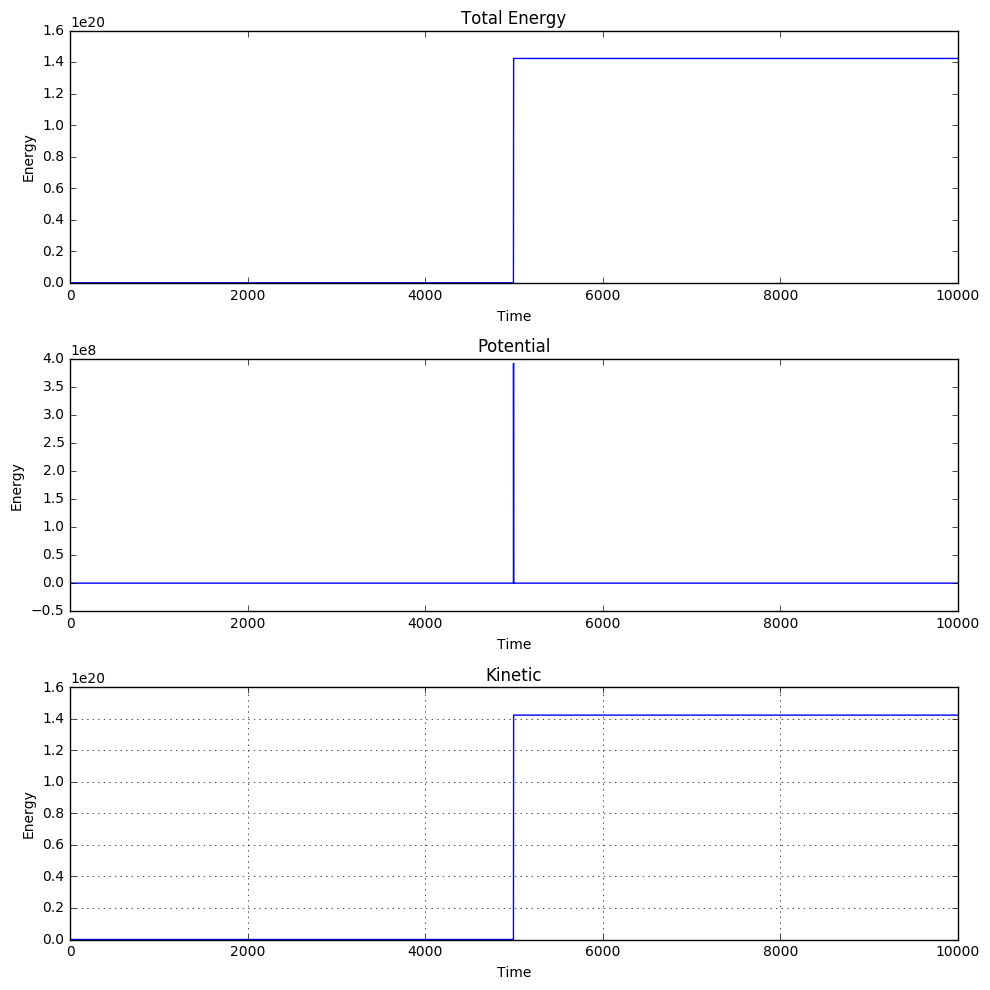

In [66]:
# Initializing variables
#epsilon = 1.654017e-21
#sigma = 3.405e-10
#M = 0.03994
#m = N * M * 6.02214179e23
#Time = sigma * np.sqrt(m/epsilon)
N=100
#velocity1 = np.zeros((100,2))
velocity1 = init_vel(N)
# Separates the velocity in to two arrays
v_x = velocity1[:, 0]
v_y = velocity1[:, 1]

gTE = np.array([])
gK = np.array([])
gP = np.array([])

x,y = position(N)

time_step = 0.005

# Calculating Total Energy
Kinetic = (0.5*((v_x**2 + v_y**2)))
U = np.array([])
for i in range(len(x)):
    p_radii = radius(x,y,i)
    U = np.append(U, Potential(p_radii, i))
Tot_Energy = U + Kinetic
gTE = np.append(gTE, sum(Tot_Energy))
gP = np.append(gP, sum(U))
gK = np.append(gK, sum(Kinetic))

# Initializing xyz file
file = open("test9.xyz","w")
file.write('100\n')
file.write('x, y, vx, vy, KE\n')
for i in range(len(x)):
    # Writes information to animation file
    file.write(str(x[i]))
    file.write(' ')
    file.write(str(y[i]))
    file.write(' ')
    file.write(str(v_x[i]))
    file.write(' ')
    file.write(str(v_y[i]))
    file.write(' ')
    file.write(str(Kinetic[i]))
    file.write('\n')

# Specified time
for z in range(10000):
    # Writes the beginning line for the file
    file.write('100\n')
    file.write('x, y, vx, vy, KE\n')
    
    F_x = np.array([])
    F_y = np.array([])
    U = np.array([])
    for i in range(len(x)):
        p_radii = radius(x,y,i)
        F_x = np.append(F_x,x_Force(p_radii,x,i))
        F_y = np.append(F_y,y_Force(p_radii,y,i))
        U = np.append(U, Potential(p_radii, i))
        
    # Calculates the Force for every particle
    # Difference equations that calculate position and velocity
    x = np.array((x) + ((v_x)*(time_step)))
    v_x = np.array((v_x) + (F_x*time_step))
    y = np.array((y) + ((v_y)*(time_step)))
    v_y = np.array((v_y) + (F_y*time_step))
    
    # Periodic Boundary Conditions
    x[np.where(x >= 20)] -= 20
    x[np.where(x <= 0)] += 20
    y[np.where(y >= 20)] -= 20
    y[np.where(y <= 0)] += 20
    
    # Saves Kinetic Energy for each particle
    Kinetic = (0.5*((v_x**2 + v_y**2)))
    # Calculating Total Energy
    Tot_Energy = U + Kinetic
    # Total Energy
    gTE = np.append(gTE, sum(Tot_Energy))
    #Potential Energy
    gP = np.append(gP, sum(U))
    # Kinetic Energy
    gK = np.append(gK, sum(Kinetic))
    
    for i in range(len(x)):
        # Writes information to animation file
        file.write(str(x[i]))
        file.write(' ')
        file.write(str(y[i]))
        file.write(' ')
        file.write(str(v_x[i]))
        file.write(' ')
        file.write(str(v_y[i]))
        file.write(' ')
        file.write(str(Kinetic[i]))
        file.write('\n')
        
        
file.close()
print('All Done!')

fig, ax = plt.subplots(3, figsize=(10,10))

ax[0].plot(np.linspace(0,10000,num=len(gTE)), gTE)
ax[0].set_title('Total Energy')
ax[0].set_ylabel('Energy')
ax[0].set_xlabel('Time')
plt.grid()
ax[1].plot(np.linspace(0,10000, num=len(gP)), gP)
ax[1].set_title('Potential')
ax[1].set_ylabel('Energy')
ax[1].set_xlabel('Time')
plt.grid()
ax[2].plot(np.linspace(0, 10000, num=len(gK)), gK)
ax[2].set_title('Kinetic')
ax[2].set_ylabel('Energy')
ax[2].set_xlabel('Time')
plt.grid()
plt.tight_layout()

fig.savefig('Energy.pdf')